## KNN 
* k 최근접 이웃(k-nearest neighbors) 알고리즘
* 머신러닝 분류에 자주 사용되는 대표 알고리즘
* 얼굴인식, 개인영화추천, 질병 유전자 패턴 식별에 활용
* KNN의 K는 가장 가까운 이웃 '하나'가 아니고 훈련 데이터 중 새로운 데이터와 가장 가까운 k개의 이웃을 찾는다는 의미
* 즉, 하나의 관측값은 거리가 가까운 k개의 이웃 관측값들과 비슷한 특성을 갖는다고 가정함
    + 거리를 구할때는 유클리드 거리, 맨해튼 거리, 코사인 유사도, 피어슨 상관계수등이 사용됨
* 따라서, K개 이웃의 목표변수 중 다수결로 가장 많은 범주에 속한 값을 결과로 반환
* KNN 알고리즘에서는 k를 얼마로 설정하느냐에 따라 결과와 성능이 달라짐
    + k가 작으면 데이터의 범위가 좁아짐 - 과적합 위험
    + k가 크면 데이터의 범위가 넓어짐 - 일반화 위험
    + 일반적으로 k값은 데이터 건수에 제곱근을 씌운 값

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
import matplotlib.image as pltimg

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import recall_score, precision_score

from sklearn.metrics import roc_curve, roc_auc_score

In [4]:
plt.rcParams['font.family'] = 'NanumGothic'  ## 윈도우에 자체 폰트

## 과일, 채소 구분하기
* KNN 알고리즘을 이용해서 당도, 아삭함을 기준으로 과일인지 채소인지 구분
    + 당도가 6, 아삭함이 4 인 토마토는 채소인가 과일인가?

In [51]:
fresh = pd.read_csv('data/fresh.csv', encoding='euc-kr')
fresh.columns = ['name','sweet','crunchy','class']
fresh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     15 non-null     object
 1   sweet    15 non-null     int64 
 2   crunchy  15 non-null     int64 
 3   class    15 non-null     object
dtypes: int64(2), object(2)
memory usage: 608.0+ bytes


In [52]:
# # 레이블 인코딩 1
# cols = ['class']

# for c in cols:
#     fresh[c] = pd.Categorical(fresh[c])
#     fresh[c] = fresh[c].cat.codes
# fresh.head()

In [53]:
# 레이블 인코딩 2 - map
# 객체명.map({범주:값, ...})
fresh['target'] = fresh['class'].map({'과일':0,'단백질':1,'채소':2})
fresh.head(3)

,name,sweet,crunchy,class,target
0,포도,8,5,과일,0
1,생선,2,2,단백질,1
2,당근,6,10,채소,2


In [54]:
# plt.scatter(fresh.sweet,fresh.crunchy, c=fresh['class'])
# plt.grid()
# plt.show()

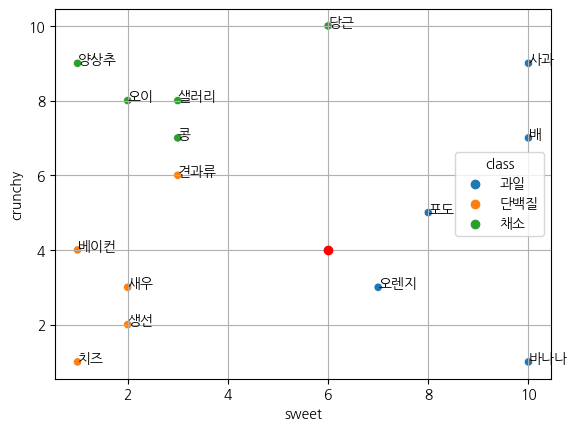

In [55]:
sns.scatterplot(data=fresh, x='sweet' , y='crunchy', hue='class')
plt.plot(6,4,'ro')
for i, n in enumerate(fresh.name):
    plt.annotate(n,(fresh.sweet[i],fresh.crunchy[i]))
plt.grid()
plt.show()

In [56]:
data = fresh.iloc[:,1:3]
target = fresh.target

In [57]:
# n_neighbors : 학습시 대상 이웃수 지정 ( 기본 : 5 )
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(data.to_numpy(),target)
knn.score(data.to_numpy(),target)

0.9333333333333333

In [58]:
one = [[6,4]]
knn.predict(one)

array([0], dtype=int64)

## 적절한 k값 찾기
* n_neighbors 값을 설정했을때의 정확도 조사

In [63]:
from sklearn.model_selection import cross_val_score

scores = []
for n in range(1, 10+1) : 
    knn = KNeighborsClassifier(n_neighbors=n)
    score = cross_val_score(knn, data, target, cv=5, scoring='accuracy')
    scores.append(np.mean(score))

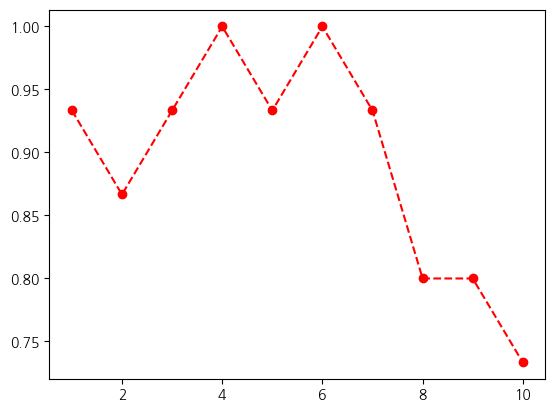

In [64]:
plt.plot(range(1,10+1),scores, 'ro--')
plt.show()

## 농구선수 게임데이터를 이용해서 포지션 예측
* 2017 NBA 농구선수의 실제 데이터를 참고
    + player 선수이름
    + pos 포지션
    + 3p 한 경기 평균 3점슛 성공횟수
    + 2p 한 경기 평균 2점슛 성공횟수
    + trb 한 경기 평균 리바운드 성공횟수
    + ast 한 경기 평균 어시스트 성공횟수
    + stl 한 경기 평균 스틸성공횟수
    + blk 한 경기 평균 블로킹 성공횟수
* c 센터 : 골대 근처 블로킹,리바운드,슛찬스를 만듬
* sg 슈팅가드 : 주로 장거리에서 슛을 쏴서 점수를 얻음
* 3점슛, 블록킹수에 따라 포지션이 결정된다고 가정하면
    + 만일, 3점슛이 2.5, 블록킹수 2일 경우 포지션은?    
* 또한, 센터와 슈팅가드를 구분하기 위해 도움이 되는 특성feature은?

In [122]:
bbplayer = pd.read_csv('data/bbplayer.csv')
bbplayer.head(3)

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6


In [123]:
# 레이블 인코딩 2 - map
# 객체명.map({범주:값, ...})
bbplayer['target'] = bbplayer['Pos'].map({'SG':0,'C':1})
bbplayer.head(3)

,Player,Pos,3P,2P,TRB,AST,STL,BLK,target
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1,0
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0,1
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6,1


### 포지션을 결정짓는 요인 파악
* 센터/슈팅가드를 구분지을 명확한 경계 없음 : 2점슛, 스틸, 어시스트
* 센터/슈팅가드를 구분지을 명확한 경계 있음 : 3점슛, 리바운드, 블로킹
     + 단, 스틸, 블로킹으로 조합했을때도 명확한 경계가 존재
     + 하지만, 슈팅가드/센터라는 포지션을 구분하기에
       적당한 속성이라 보기 힘듦 

In [ ]:
# 시각화1 (스틸/2점슛)

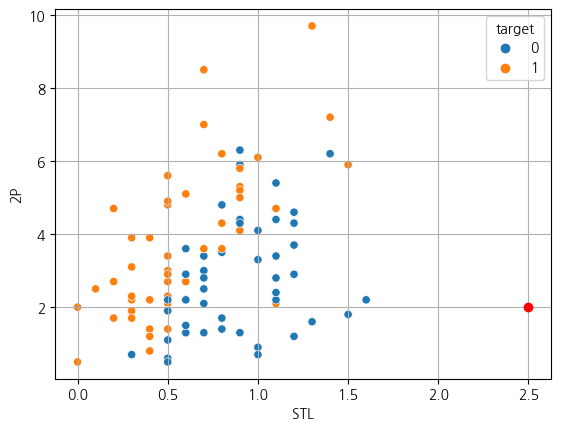

In [82]:
sns.scatterplot(data=bbplayer, x='STL' , y='2P', hue='target')

plt.grid()
plt.show()

In [ ]:
# 시각화2 (어시스트/2점슛)

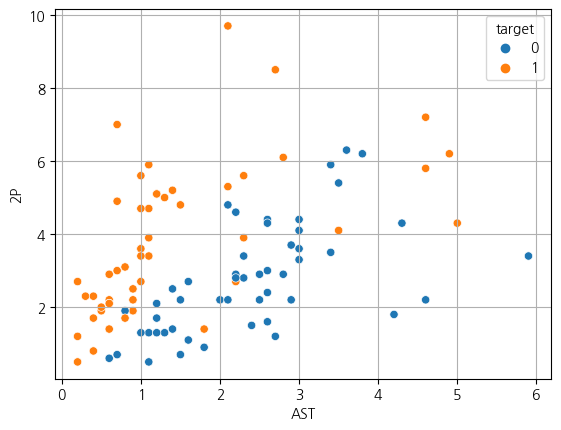

In [83]:
sns.scatterplot(data=bbplayer, x='AST' , y='2P', hue='target')

plt.grid()
plt.show()

In [ ]:
# 시각화3 (블로킹/3점슛)

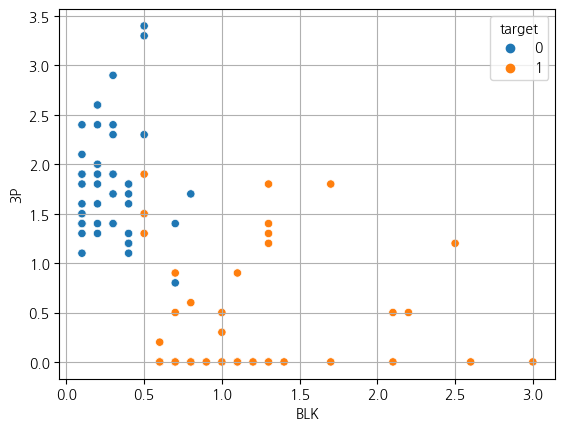

In [84]:
sns.scatterplot(data=bbplayer, x='BLK' , y='3P', hue='target')

plt.grid()
plt.show()

In [ ]:
# 시각화4 (리바운드/3점슛)

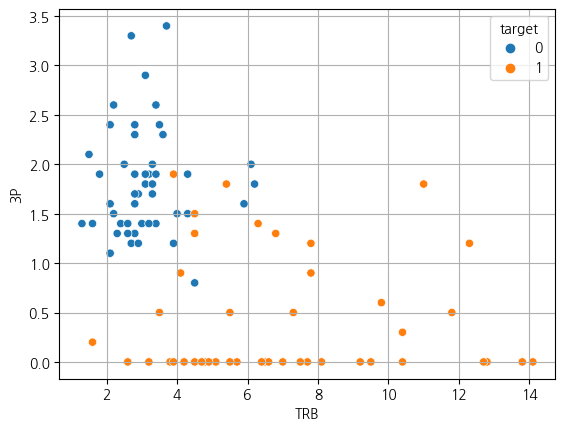

In [85]:
sns.scatterplot(data=bbplayer, x='TRB' , y='3P', hue='target')

plt.grid()
plt.show()

In [ ]:
# 시각화5 (스틸/블로킹)

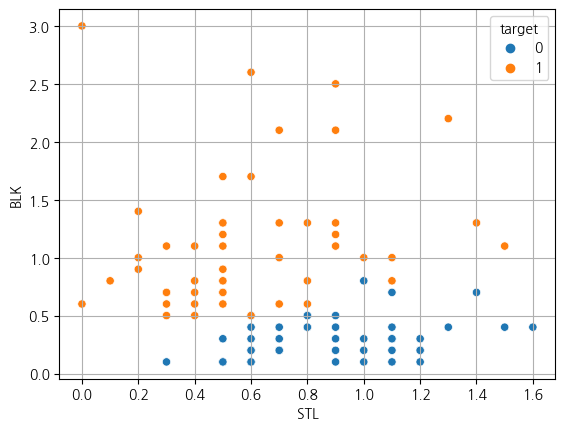

In [86]:
sns.scatterplot(data=bbplayer, x='STL' , y='BLK', hue='target')

plt.grid()
plt.show()

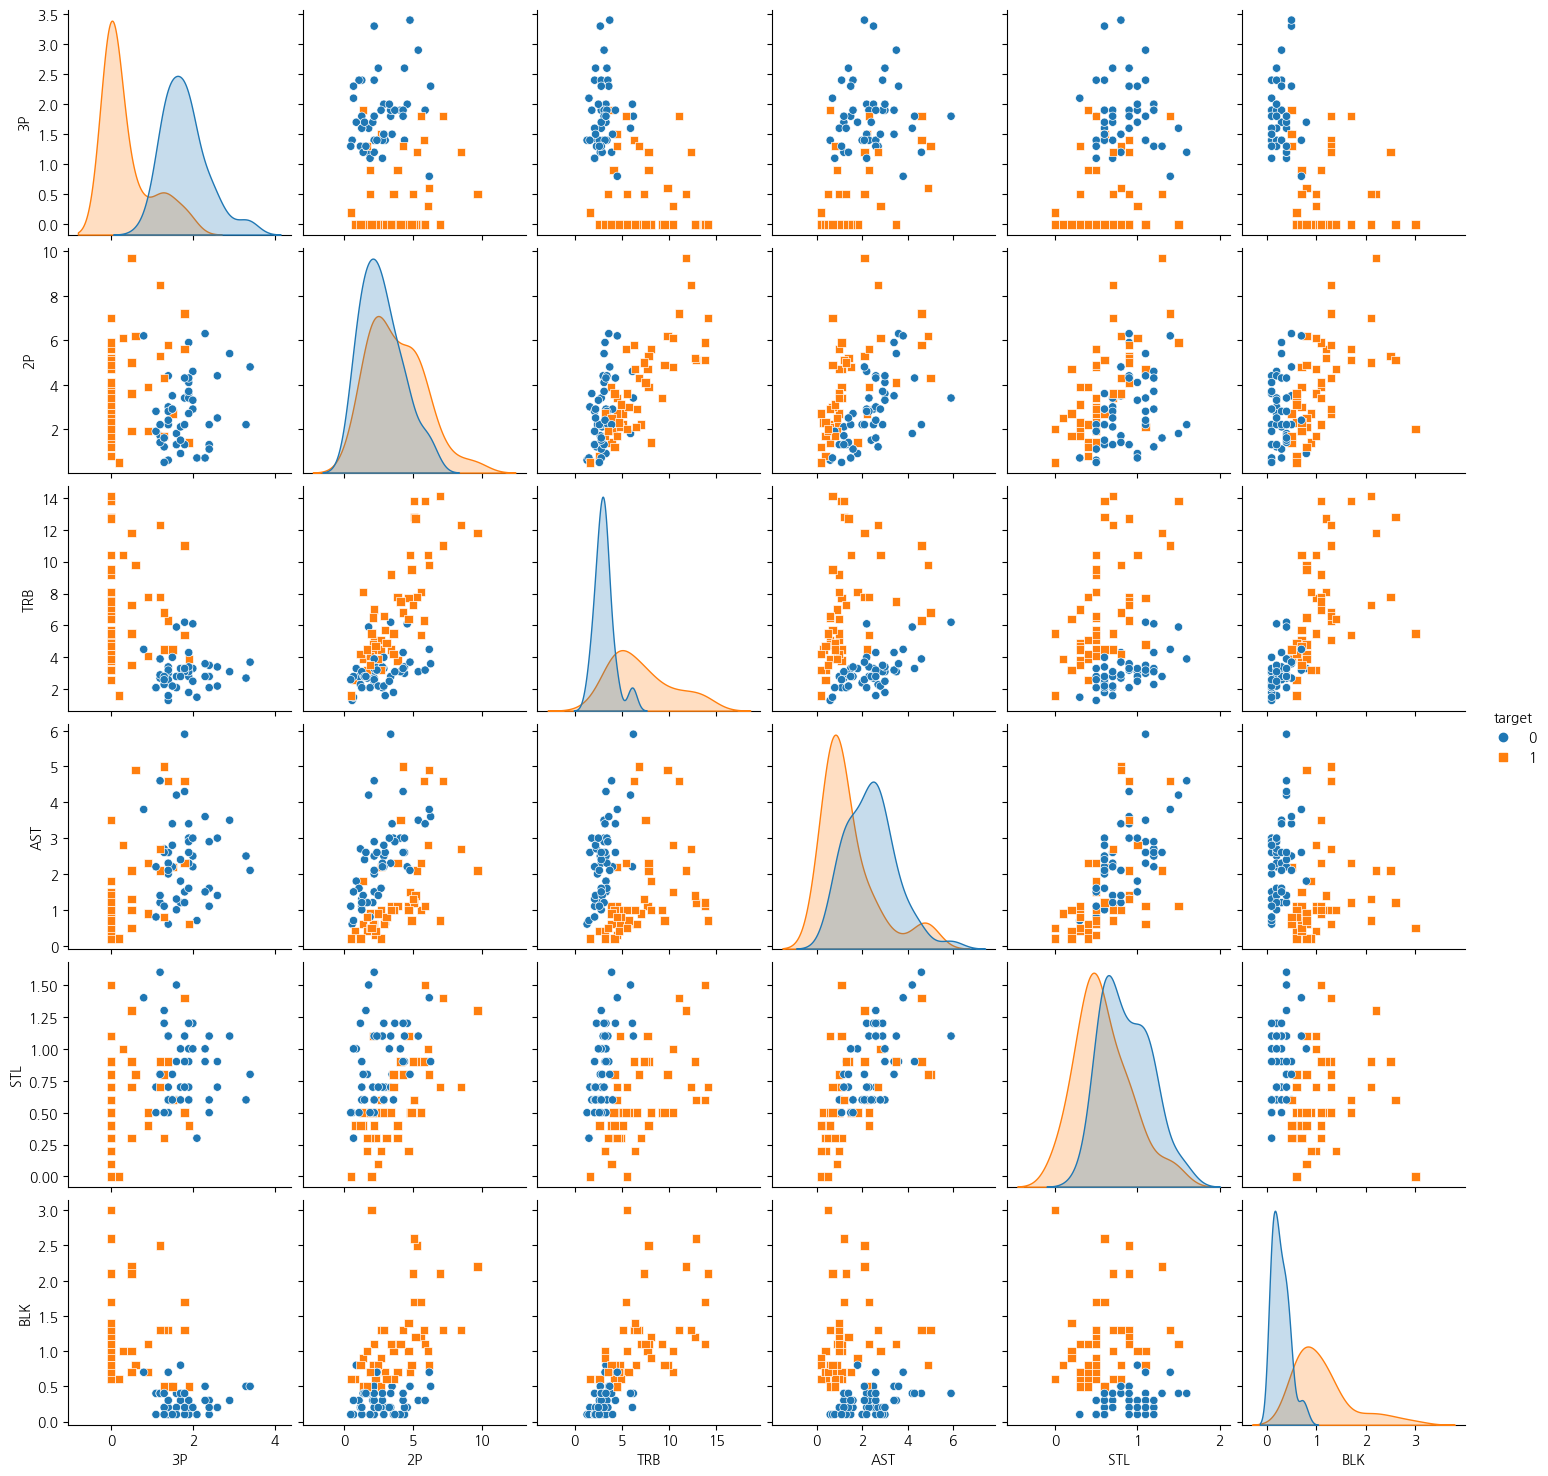

In [90]:
sns.pairplot(bbplayer, hue='target',markers=['o','s'])
plt.show()

In [124]:
data = bbplayer.loc[:,['BLK','3P']]
target = bbplayer.Pos.map({'C':0,'SG':1})

In [125]:
X_train, X_test, Y_train,Y_test = train_test_split(data,target, train_size=0.7, stratify=target, random_state=2211211235)

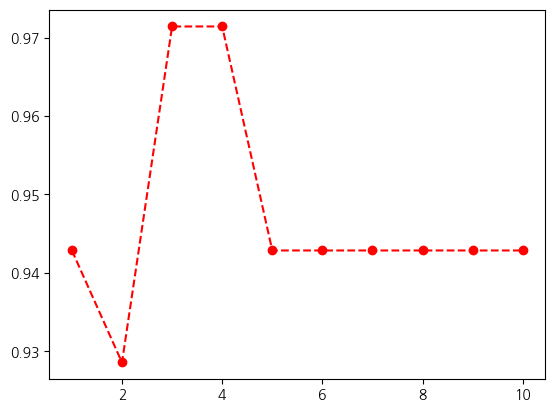

In [126]:
scores = []
for n in range(1, 10+1) : 
    knn = KNeighborsClassifier(n_neighbors=n)
    score = cross_val_score(knn, X_train, Y_train, cv=5, scoring='accuracy')
    scores.append(np.mean(score))
    
plt.plot(range(1,10+1),scores, 'ro--')
plt.show()  # => 적절한 k값 : 5

In [113]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train.to_numpy(),Y_train)
pred = knn.predict(X_test)

print(knn.score(X_train.to_numpy(), Y_train), accuracy_score(Y_test,pred))

0.9714285714285714 0.9333333333333333


C:\Users\LG PC\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [115]:
one = [[2.5,2], [3,1]]
knn.predict(one)

array([1, 0], dtype=int64)

## pima 인디언 당뇨병 예측